# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Data\officialbhafc_after.csv')


In [4]:
df

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,yêu thích,wow,thương thương,haha,buồn,phẫn nộ,hour,day,month,year
0,917052499787454,This front two… 🤩🔥\n\nHai mặt trước này... 🤩🔥,This front two \n\nHai mt trc ny,0,This front two… 🤩🔥,2023-11-25 23:03:58,1700928238,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...,...,247.0,1.0,14.0,0.0,0.0,0.0,23,25,11,2023
1,917010603124977,"Afternoon, Albion! 😁👋\n\nChào buổi chiều, Albi...",Afternoon Albion \n\nCho bui chiu Albion,0,"Afternoon, Albion! 😁👋",2023-11-25 21:46:40,1700923600,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...,...,230.0,0.0,15.0,2.0,0.0,0.0,21,25,11,2023
2,916986813127356,TEAM NEWS! 🚨Here's our #NFOBHA starting XI. 👀📝...,TEAM NEWS Heres our NFOBHA starting XI \n\nTIN...,0,TEAM NEWS! 🚨Here's our #NFOBHA starting XI. 👀📝,2023-11-25 21:00:25,1700920825,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...,...,235.0,1.0,13.0,1.0,3.0,0.0,21,25,11,2023
3,916925506466820,Facundo’s first Albion goal came against Fores...,Facundos first Albion goal came against Forest...,0,Facundo’s first Albion goal came against Fores...,2023-11-25 18:34:24,1700912064,0,https://scontent.fhan14-3.fna.fbcdn.net/v/t51....,[],...,61.0,0.0,3.0,2.0,0.0,0.0,18,25,11,2023
4,916913676468003,An UNFORGETTABLE last minute win at Forest bac...,An UNFORGETTABLE last minute win at Forest bac...,0,An UNFORGETTABLE last minute win at Forest bac...,2023-11-25 18:03:08,1700910188,0,https://scontent.fhan14-4.fna.fbcdn.net/v/t15....,[],...,36.0,0.0,2.0,0.0,0.0,0.0,18,25,11,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,904378794388158,Steeley is here to stay! 💙🤍\n\nSteeley ở đây đ...,Steeley is here to stay \n\nSteeley y li,0,Steeley is here to stay! 💙🤍,2023-11-02 18:52:05,1698925925,0,https://scontent.fhan14-4.fna.fbcdn.net/v/t51....,[],...,106.0,0.0,5.0,0.0,1.0,0.0,18,2,11,2023
96,904319421060762,Jason Steele has further committed his future ...,Jason Steele has further committed his future ...,0,0,2023-11-02 16:00:16,1698915616,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...,...,471.0,5.0,17.0,3.0,1.0,3.0,16,2,11,2023
97,904093027750068,Our first British Airways Player of the Match!...,Our first British Airways Player of the Match ...,0,Our first British Airways Player of the Match!...,2023-11-02 03:57:23,1698872243,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,...,604.0,1.0,34.0,0.0,0.0,2.0,3,2,11,2023
98,904065187752852,Dunky is an @easportsfc Centurion. 🤩🐐\n\nDunky...,Dunky is an easportsfc Centurion \n\nDunky l m...,0,Dunky is an @easportsfc Centurion. 🤩🐐,2023-11-02 02:23:15,1698866595,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...,...,261.0,1.0,19.0,0.0,0.0,2.0,2,2,11,2023


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        100 non-null    int64  
 1   text                           100 non-null    object 
 2   post_text                      95 non-null     object 
 3   shared_text                    100 non-null    object 
 4   original_text                  100 non-null    object 
 5   time                           100 non-null    object 
 6   timestamp                      100 non-null    int64  
 7   image                          100 non-null    object 
 8   image_lowquality               100 non-null    object 
 9   images                         100 non-null    object 
 10  images_description             100 non-null    object 
 11  images_lowquality              100 non-null    object 
 12  images_lowquality_description  100 non-null    obje

In [6]:
df[['time','timestamp' ,'reaction_count']]

,time,timestamp,reaction_count
0,2023-11-25 23:03:58,1700928238,1498
1,2023-11-25 21:46:40,1700923600,1725
2,2023-11-25 21:00:25,1700920825,1624
3,2023-11-25 18:34:24,1700912064,440
4,2023-11-25 18:03:08,1700910188,355
...,...,...,...
95,2023-11-02 18:52:05,1698925925,1046
96,2023-11-02 16:00:16,1698915616,4212
97,2023-11-02 03:57:23,1698872243,4799
98,2023-11-02 02:23:15,1698866595,1992


## Reactions analysis

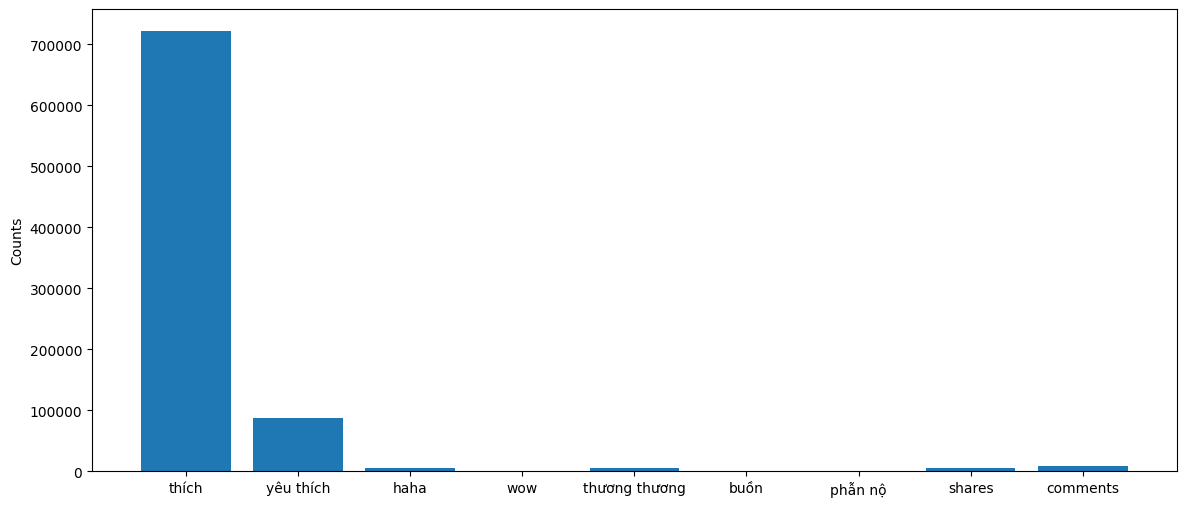

In [7]:
total_reactions = df[['thích', 'yêu thích', 'haha', 'wow', 'thương thương', 'buồn', 'phẫn nộ', 'shares', 'comments']].sum()
plt.figure(figsize=(14, 6))

plt.bar(total_reactions.index, total_reactions.values)

plt.ylabel('Counts')
plt.show()

## Read all posts

In [56]:
df_text = df[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

,post_id,post_text
0,917052499787454,This front two \n\nHai mt trc ny
1,917010603124977,Afternoon Albion \n\nCho bui chiu Albion
2,916986813127356,TEAM NEWS Heres our NFOBHA starting XI \n\nTIN...
3,916925506466820,Facundos first Albion goal came against Forest...
4,916913676468003,An UNFORGETTABLE last minute win at Forest bac...
...,...,...
95,904378794388158,Steeley is here to stay \n\nSteeley y li
96,904319421060762,Jason Steele has further committed his future ...
97,904093027750068,Our first British Airways Player of the Match ...
98,904065187752852,Dunky is an easportsfc Centurion \n\nDunky l m...


Những từ xuất hiện phổ biến

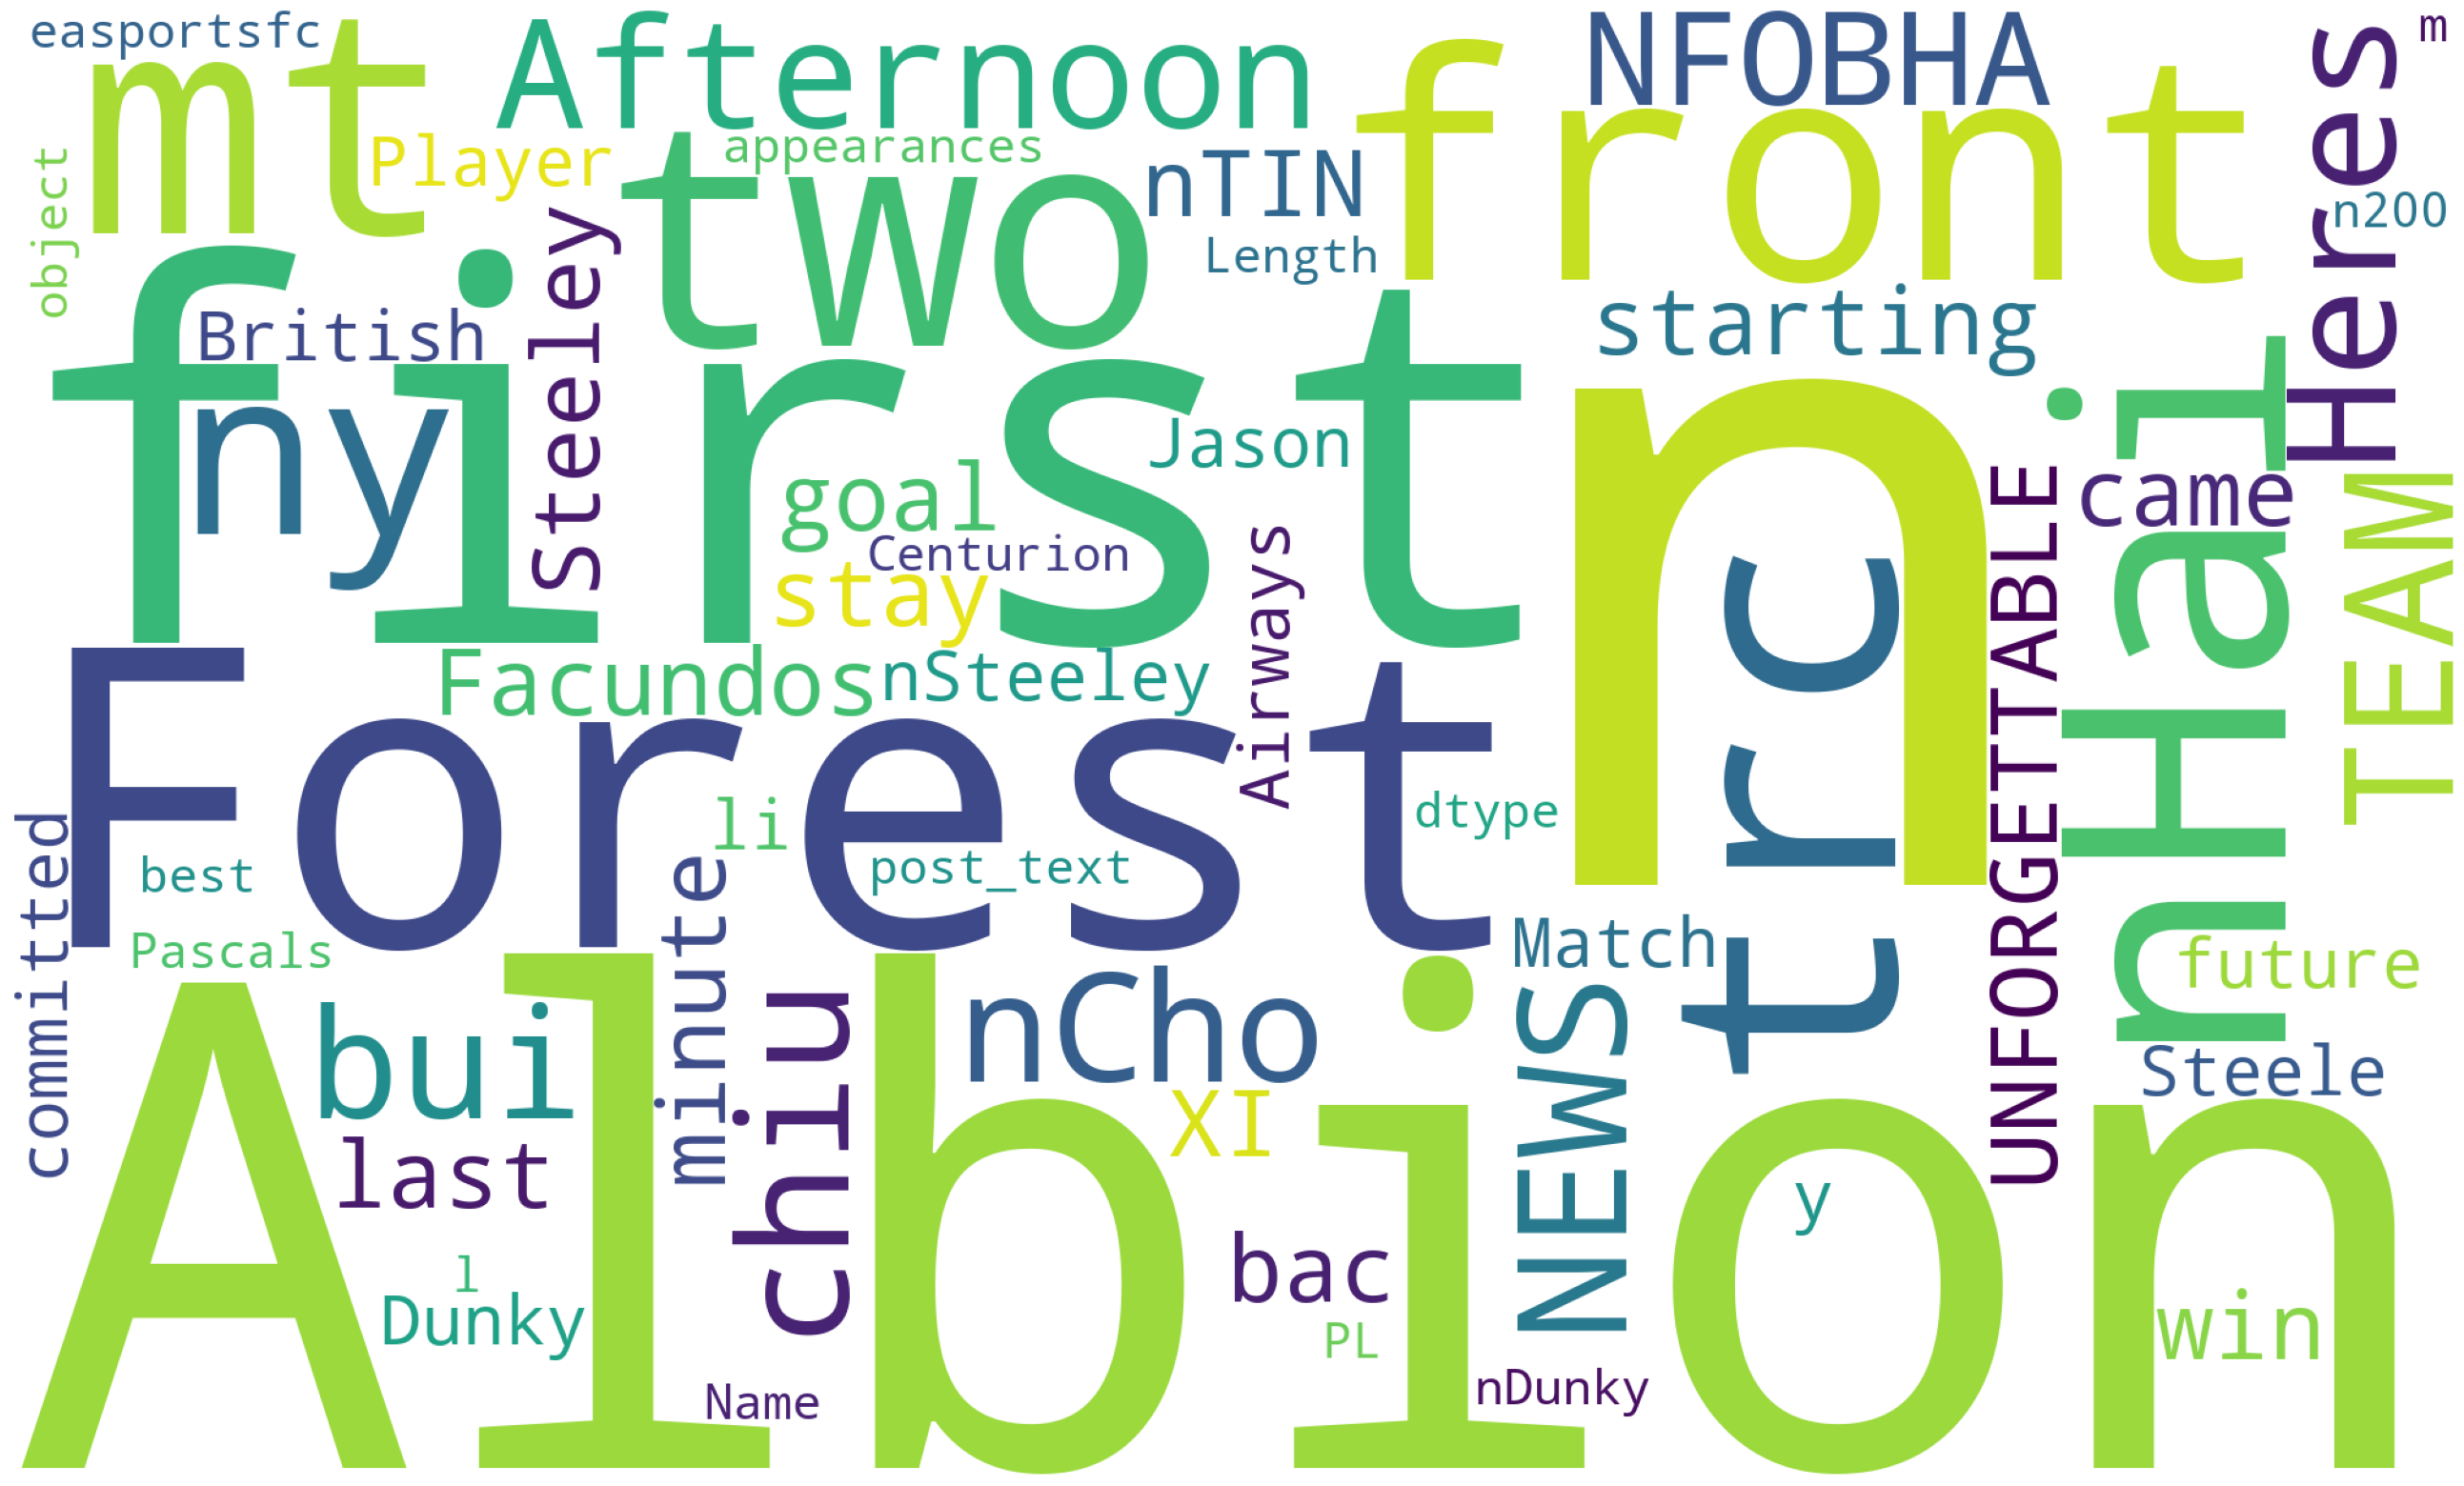

In [49]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(
                             text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<Axes: xlabel='0'>

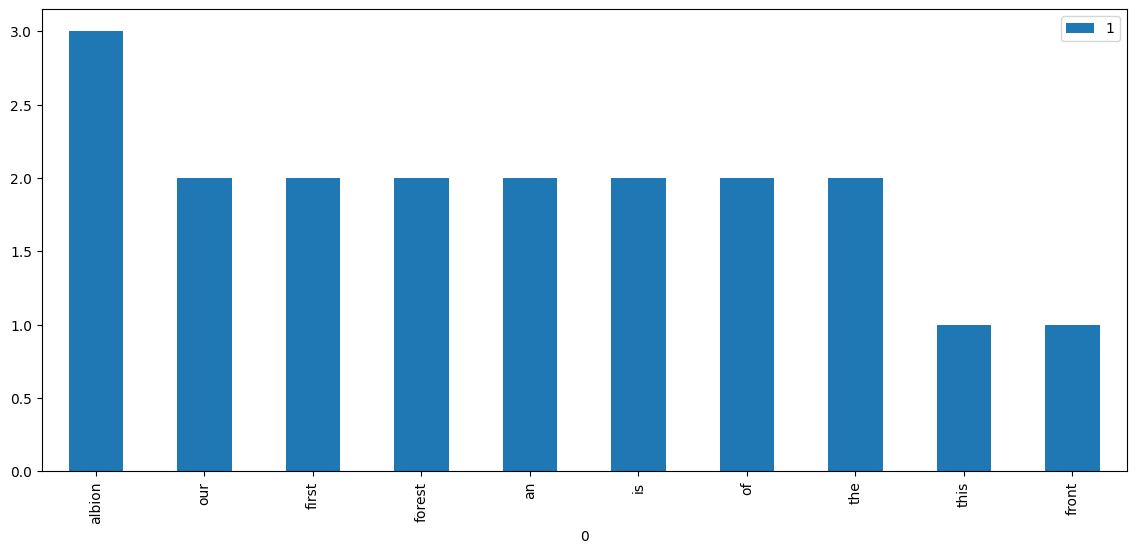

In [50]:
from collections import Counter
import re
def wordFrequency(Ttext):
    words = re.findall(r'\b\w+\b', Ttext.lower())
    filterWords = [word for word in words if len(word)>1]
    fre = Counter(filterWords)
    return fre
fre = wordFrequency(text)

top10Words = fre.most_common(10)
dft10 = pd.DataFrame(top10Words)
dft10.index = dft10[0]
dft10.plot(kind='bar',figsize=(14,6))


SỰ THAY ĐỔI LƯỢT REACT THEO THỜI GIAN

Text(0.5, 1.0, 'Sự thay đổi lượt react theo thời gian')

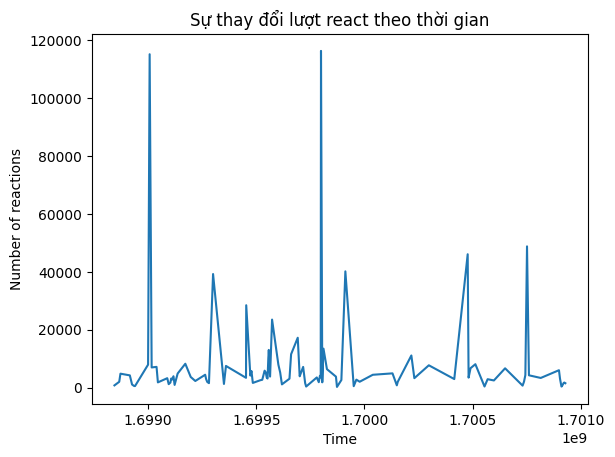

In [10]:

dates=df['timestamp'].to_list()
reaction_count=df['reaction_count'].to_list()
dates.reverse()
reaction_count.reverse()
plt.plot(dates,reaction_count)
plt.xlabel('Time')
plt.ylabel('Number of reactions')
plt.title('Sự thay đổi lượt react theo thời gian')

Text(0, 0.5, 'Reactions Count')

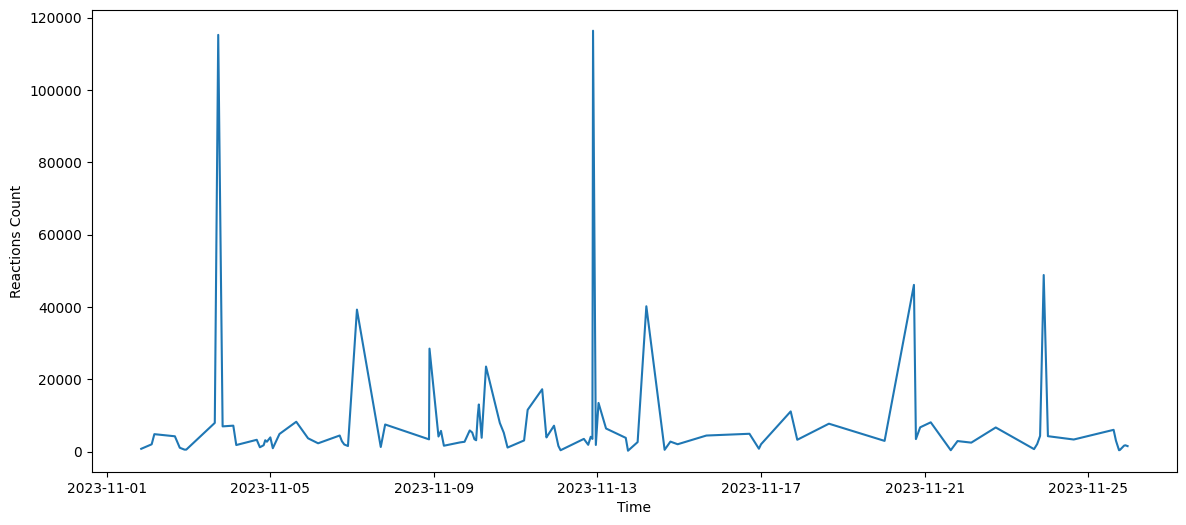

In [11]:
df['time'] = pd.to_datetime(df['time'])
plt.figure(figsize=(14, 6))

plt.plot(df['time'], df['reaction_count'])
plt.xlabel('Time')
plt.ylabel('Reactions Count')

SỰ THAY ĐỔI CỦA TỪNG LOẠI REACT

(array([19662., 19666., 19670., 19674., 19678., 19682., 19686.]),
 [Text(19662.0, 0, '2023-11-01'),
  Text(19666.0, 0, '2023-11-05'),
  Text(19670.0, 0, '2023-11-09'),
  Text(19674.0, 0, '2023-11-13'),
  Text(19678.0, 0, '2023-11-17'),
  Text(19682.0, 0, '2023-11-21'),
  Text(19686.0, 0, '2023-11-25')])

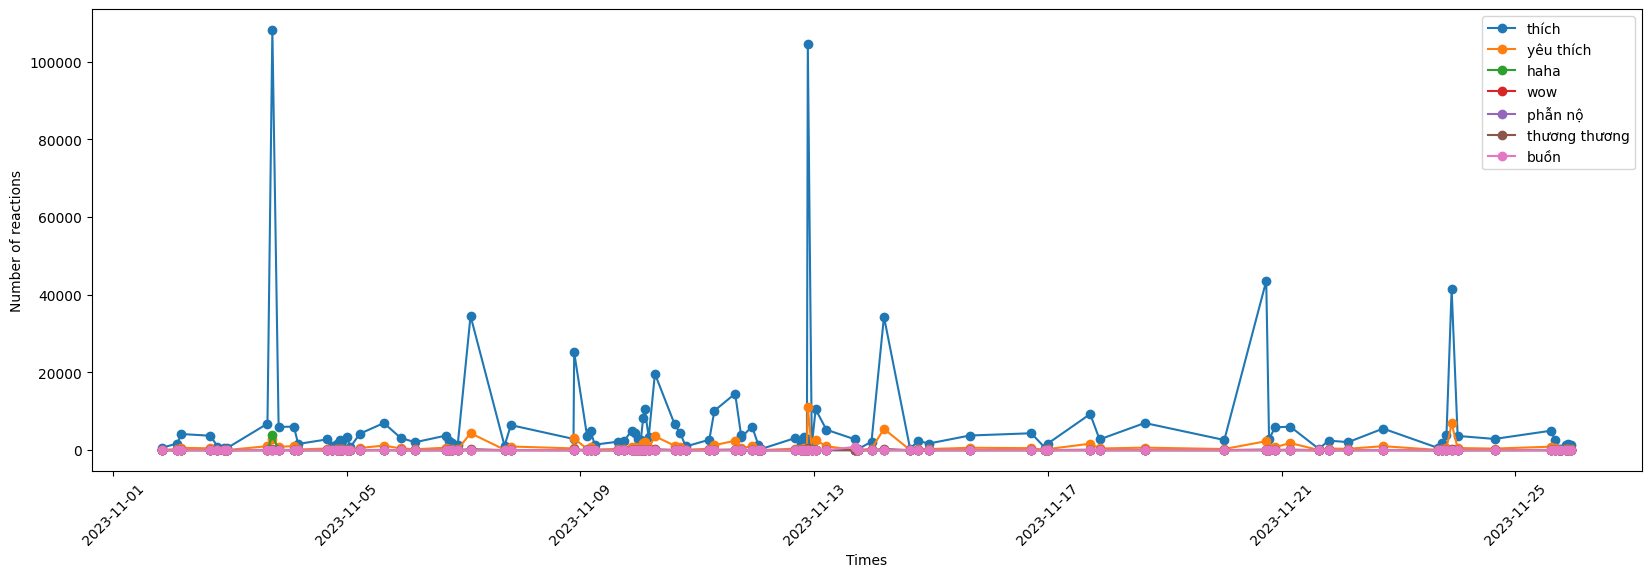

In [12]:
import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(df['time'],df['thích'],label='thích',marker='o')
ax.plot(df['time'],df['yêu thích'],label='yêu thích',marker='o')
ax.plot(df['time'],df['haha'],label='haha',marker='o')
ax.plot(df['time'],df['wow'],label='wow',marker='o')
ax.plot(df['time'],df['phẫn nộ'],label='phẫn nộ',marker='o')
ax.plot(df['time'],df['thương thương'],label='thương thương',marker='o')
ax.plot(df['time'],df['buồn'],label='buồn',marker='o')
ax.set_xlabel('Times')
ax.set_ylabel('Number of reactions')

plt.legend()
plt.xticks(rotation=45)

BÀI VIẾT CÓ LƯỢNG TƯƠNG TÁC LỚN NHẤT TRONG BỘ DỮ LIỆU

In [13]:
df.loc[df['reaction_count'].idxmax()]

post_id                                                            909991037160267
text                             Simon Adingra can’t stop scoring! 🔥💫\n\nSimon ...
post_text                        Simon Adingra cant stop scoring \n\nSimon Adin...
shared_text                                                                      0
original_text                                 Simon Adingra can’t stop scoring! 🔥💫
time                                                           2023-11-12 21:23:07
timestamp                                                               1699798987
image                            https://scontent.fhan14-1.fna.fbcdn.net/v/t39....
image_lowquality                 https://scontent.fhan14-1.fna.fbcdn.net/v/t39....
images                           ['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...
images_description               ['Có thể là hình ảnh về 2 người, mọi người đan...
images_lowquality                ['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...
imag

In [30]:
most2_post=df.sort_values(by='reaction_count',ascending=False).head(2)

In [31]:
most2_post[['post_id','text','time']]

,post_id,text,time
39,909991037160267,Simon Adingra can’t stop scoring! 🔥💫\n\nSimon ...,2023-11-12 21:23:07
91,904976214328416,Catch Ansu if you can… 😆🚶\n\nHãy bắt Ansu nếu ...,2023-11-03 17:26:24


In [14]:
most10_post=df.sort_values(by='reaction_count',ascending=False).head(10)[['post_id','text','time']]

In [15]:
text    = str(most10_post['text'])

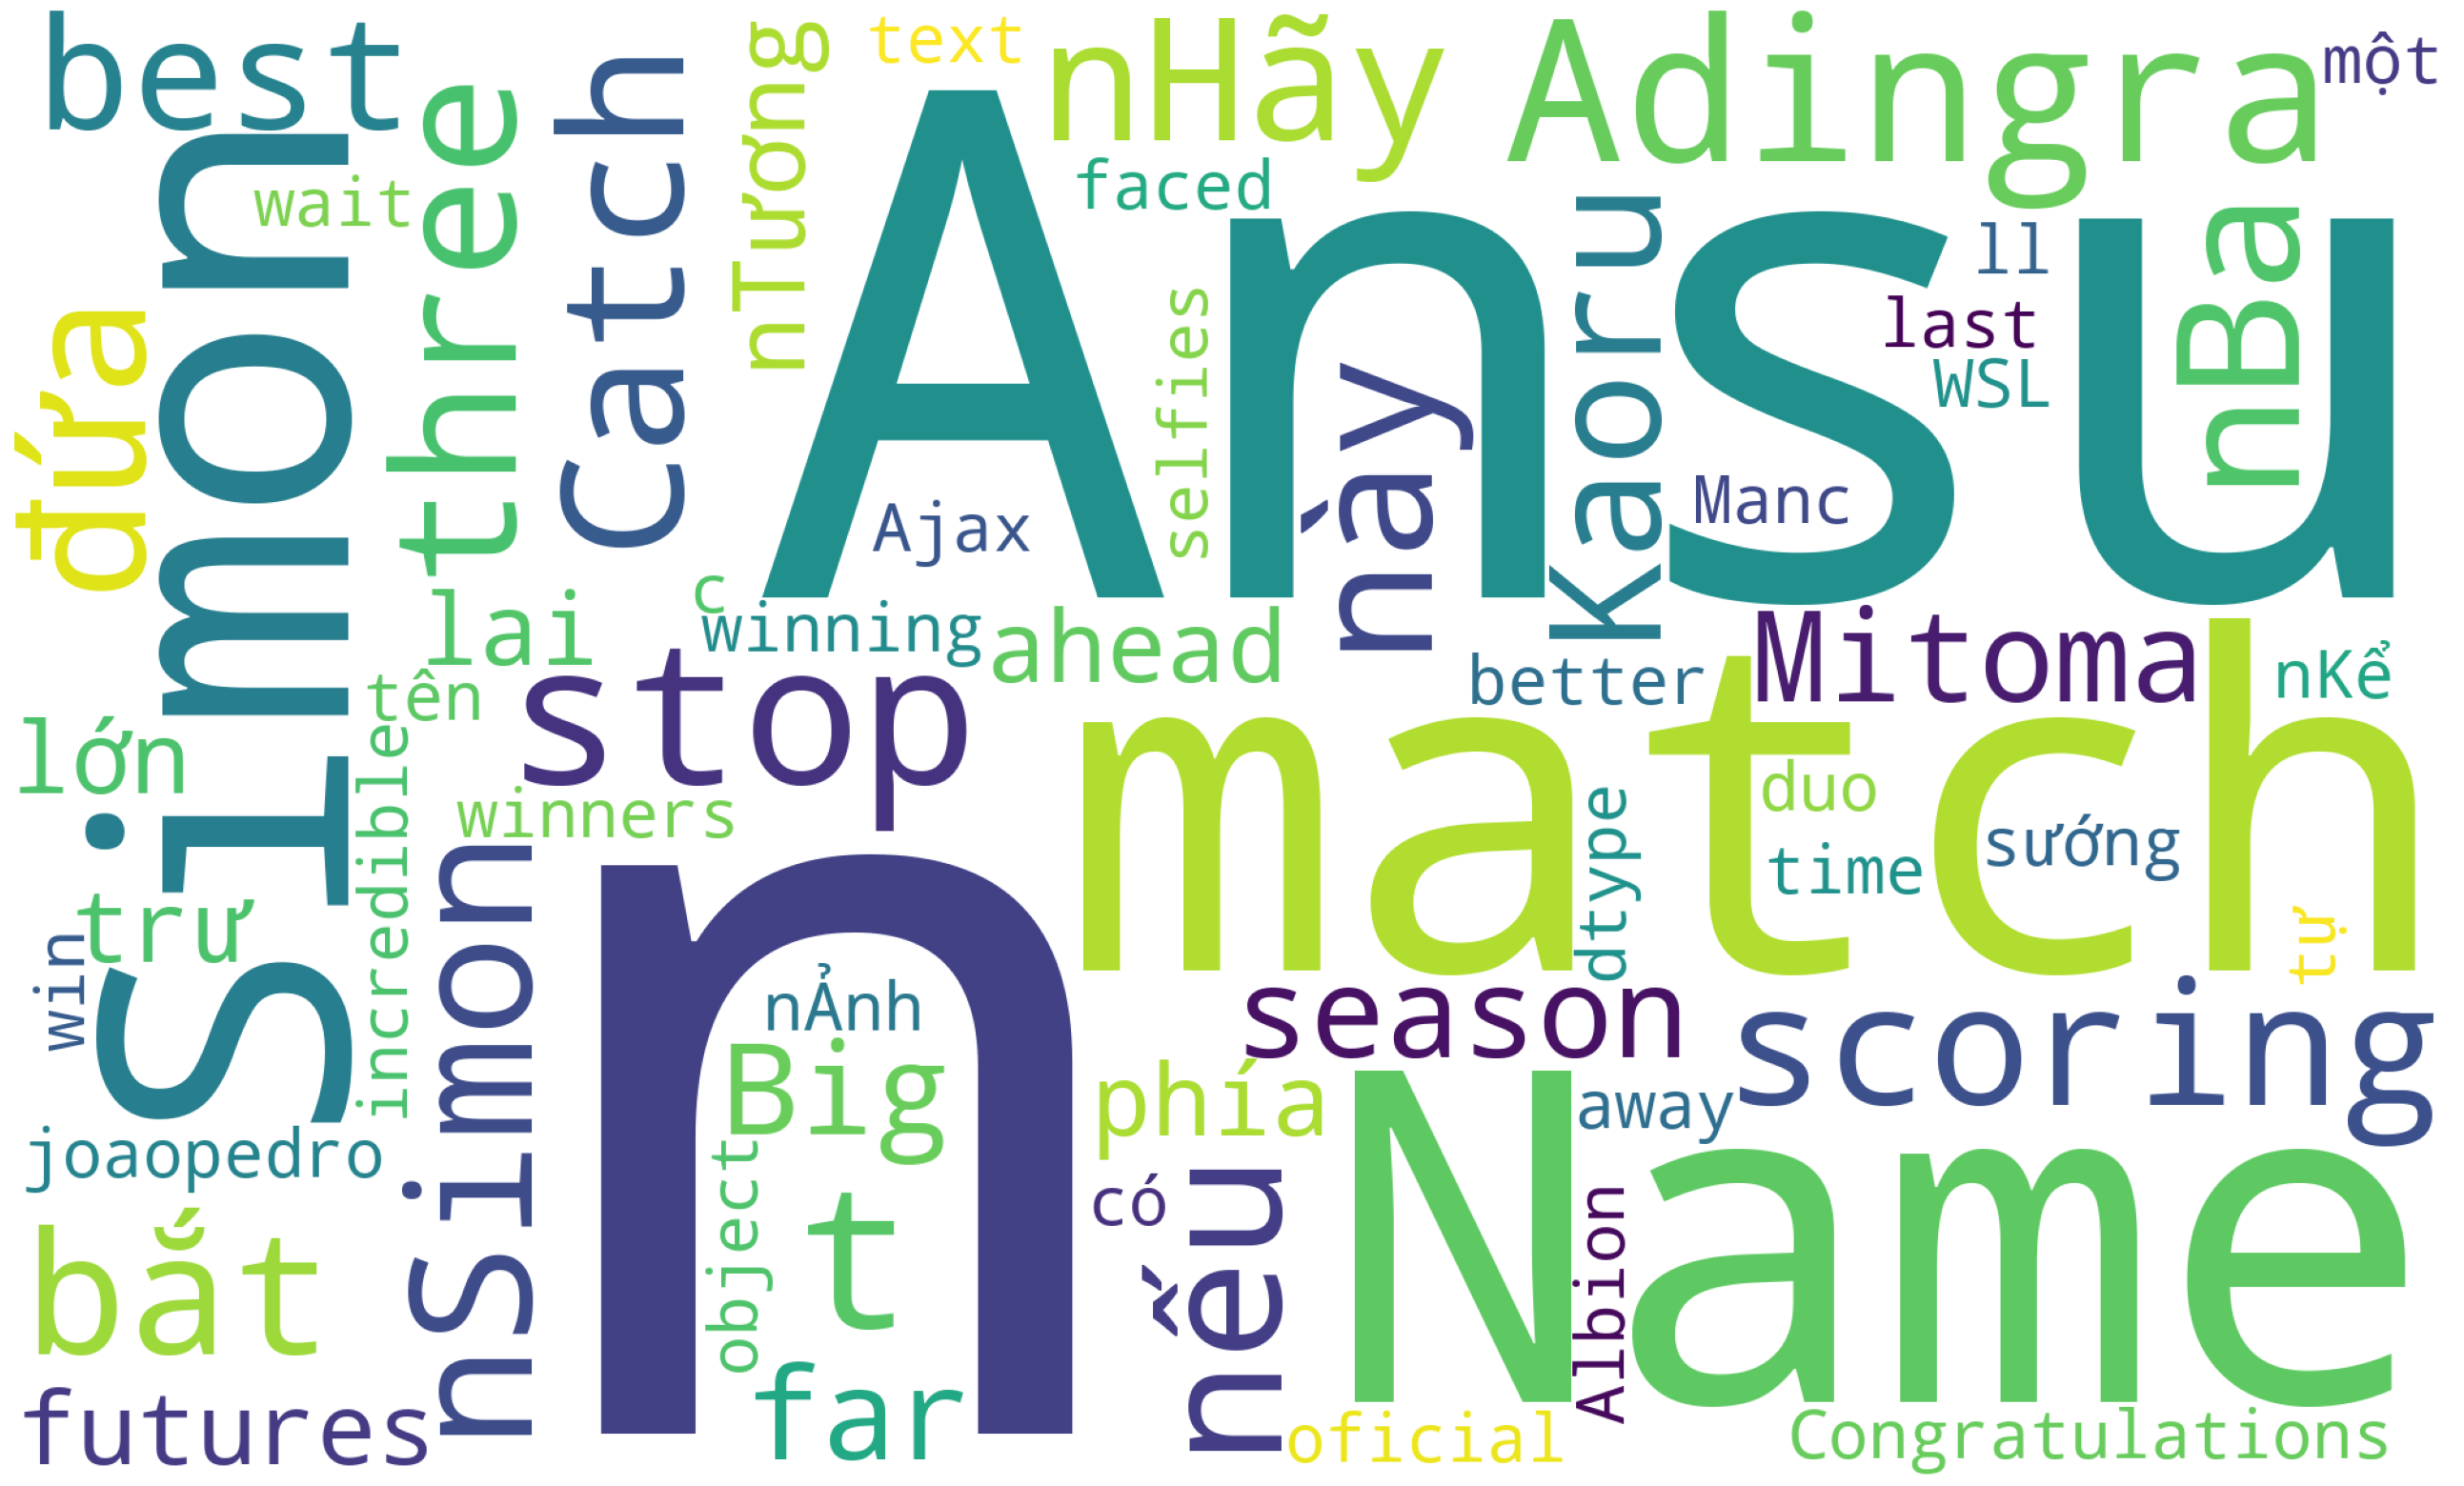

In [16]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(
                             text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


CÁC MỐC THỜI GIAN TRONG NGÀY MÀ FANPAGE THƯỜNG XUYÊN ĐĂNG BÀI VIẾT

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '21'),
  Text(1, 0, '17'),
  Text(2, 0, '18'),
  Text(3, 0, '15'),
  Text(4, 0, '16'),
  Text(5, 0, '23'),
  Text(6, 0, '22'),
  Text(7, 0, '4'),
  Text(8, 0, '2'),
  Text(9, 0, '0'),
  Text(10, 0, '19'),
  Text(11, 0, '20'),
  Text(12, 0, '1'),
  Text(13, 0, '3'),
  Text(14, 0, '5'),
  Text(15, 0, '14'),
  Text(16, 0, '7'),
  Text(17, 0, '6')])

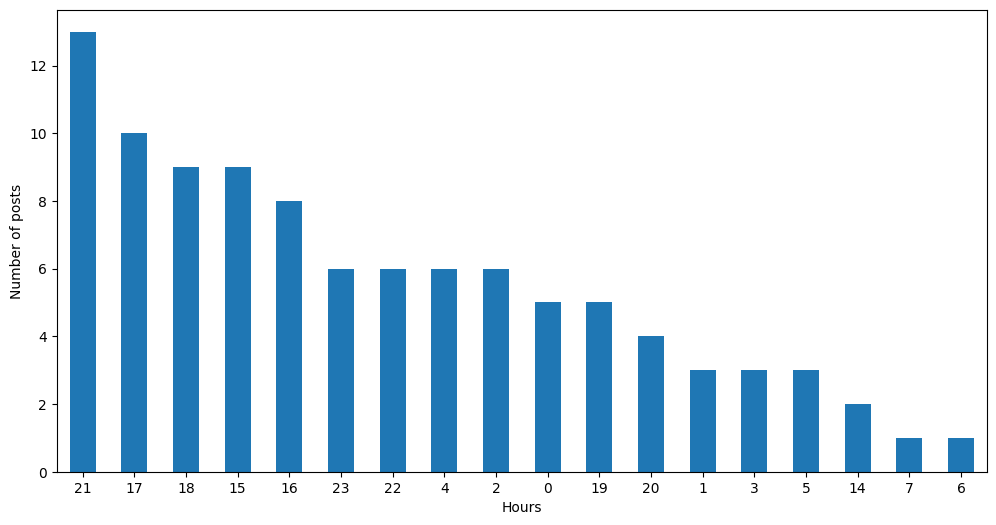

In [17]:
# Extract the hour from the 'time' column
plt.figure(figsize=(12,6))
df['hour'].value_counts().plot(kind='bar')
plt.ylabel('Number of posts')
plt.xlabel('Hours')
plt.xticks(rotation=0)


Những khoảng thời gian nhận được nhiều tương tác nhất trong ngày

Text(0.5, 0, 'Hours')

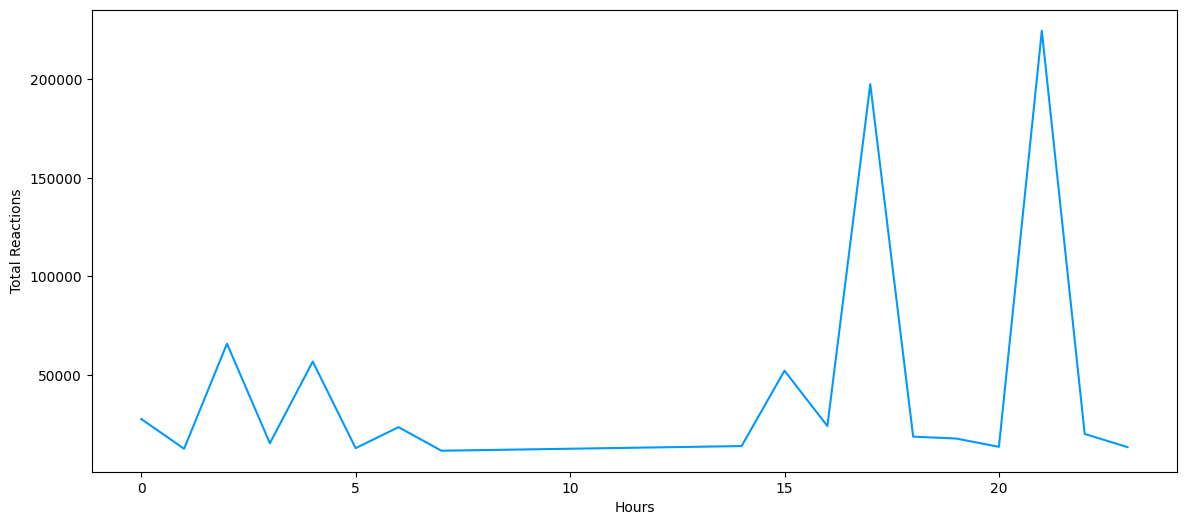

In [18]:
total_reactions_by_hour = df.groupby('hour')['reaction_count'].sum()

fig,ax=plt.subplots(figsize=(14,6))

ax.plot(total_reactions_by_hour.index, total_reactions_by_hour.values, color='#0099FF', label='Total Reactions')
ax.set_ylabel('Total Reactions')
ax.tick_params(axis='y')

plt.xlabel('Hours')

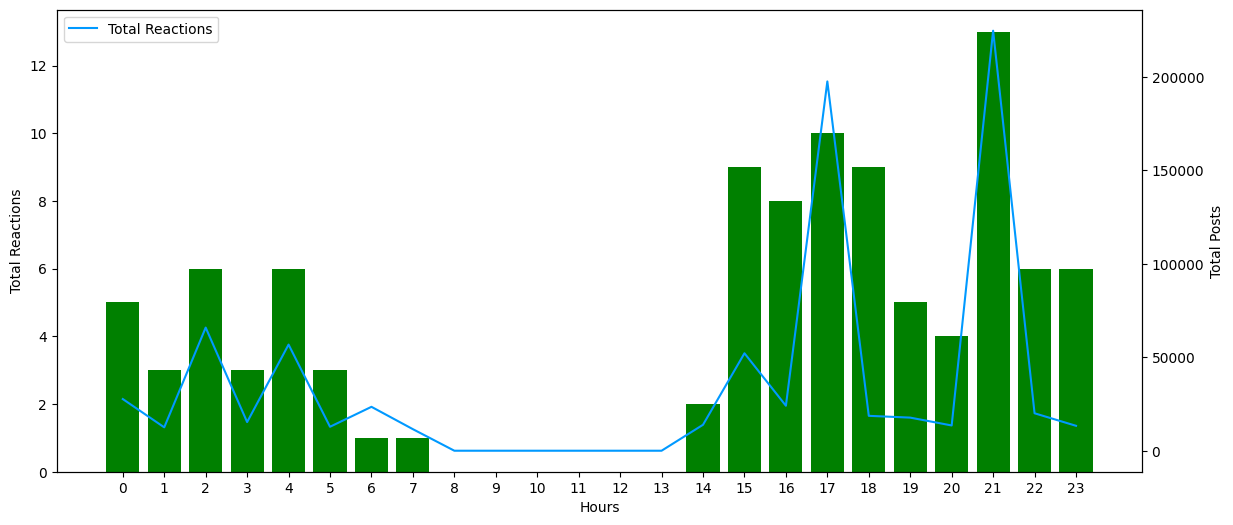

In [19]:
total_posts_by_hour = df['hour'].value_counts()

total_posts_by_hour = total_posts_by_hour.reindex(range(24), fill_value=0)
total_reactions_by_hour = total_reactions_by_hour.reindex(range(24), fill_value=0)

fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

ax1.bar(total_posts_by_hour.index, total_posts_by_hour.values, color='green', label='Total Posts')
ax1.set_xticks(total_reactions_by_hour.index)
ax1.set_xlabel('Hours')
ax1.set_ylabel('Total Reactions')
ax1.tick_params(axis='y')


ax2.plot(total_reactions_by_hour.index, total_reactions_by_hour.values, color='#0099FF', label='Total Reactions')
ax2.set_ylabel('Total Posts')
ax2.tick_params(axis='y')

plt.xlabel('Hours')
plt.legend()

In [20]:
df[['post_id','reaction_count','shares','comments','post_text']]

,post_id,reaction_count,shares,comments,post_text
0,917052499787454,1498,12,27,This front two \n\nHai mt trc ny
1,917010603124977,1725,8,55,Afternoon Albion \n\nCho bui chiu Albion
2,916986813127356,1624,34,103,TEAM NEWS Heres our NFOBHA starting XI \n\nTIN...
3,916925506466820,440,7,9,Facundos first Albion goal came against Forest...
4,916913676468003,355,9,15,An UNFORGETTABLE last minute win at Forest bac...
...,...,...,...,...,...
95,904378794388158,1046,28,14,Steeley is here to stay \n\nSteeley y li
96,904319421060762,4212,52,125,Jason Steele has further committed his future ...
97,904093027750068,4799,20,50,Our first British Airways Player of the Match ...
98,904065187752852,1992,10,14,Dunky is an easportsfc Centurion \n\nDunky l m...


SỰ TƯƠNG QUAN GIỮA SỐ LƯỢNG REACTIONS VÀ SỐ LƯỢNG BÌNH LUẬN, CHIA SẺ, ĐỘ DÀI BÀI VIẾT 

Text(0.5, 1.0, 'Reaction Count v Shares')

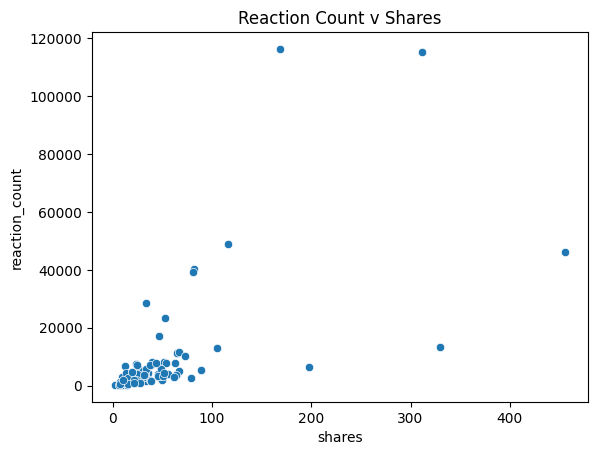

In [21]:
# plt.subplot(1,3,1)
sns.scatterplot(x='shares', y='reaction_count', data=df)
plt.title('Reaction Count v Shares')

Text(0.5, 1.0, 'Reaction Count v Comments')

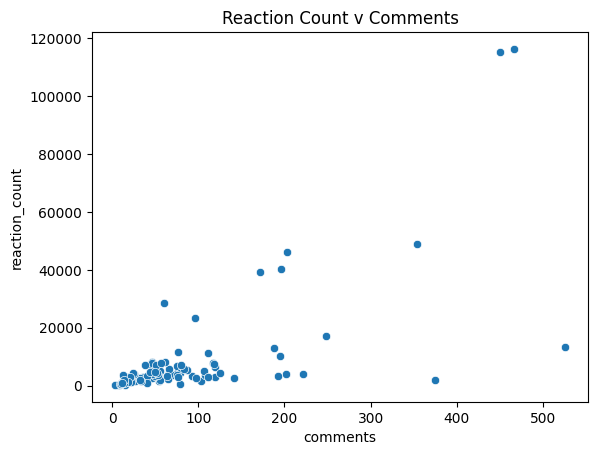

In [22]:
# plt.subplot(1,3,2)
sns.scatterplot(x='comments', y='reaction_count', data=df)
plt.title('Reaction Count v Comments')

Text(0.5, 1.0, 'Reaction Count vs Post Length')

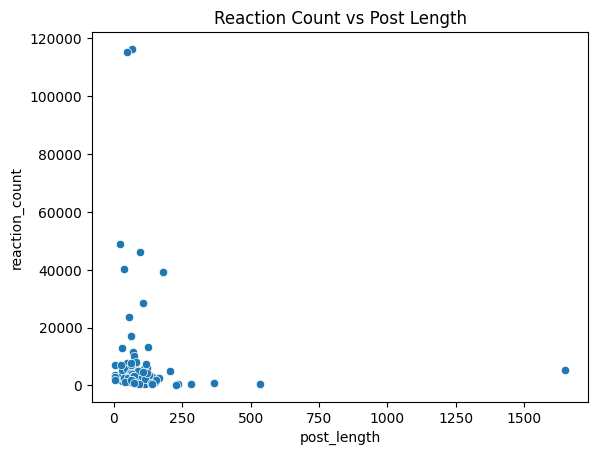

In [23]:
# plt.subplot(1,3,3)
df['post_length'] = df['post_text'].apply(lambda x:len(str(x)))
sns.scatterplot(x='post_length', y='reaction_count', data=df)
plt.title('Reaction Count vs Post Length')

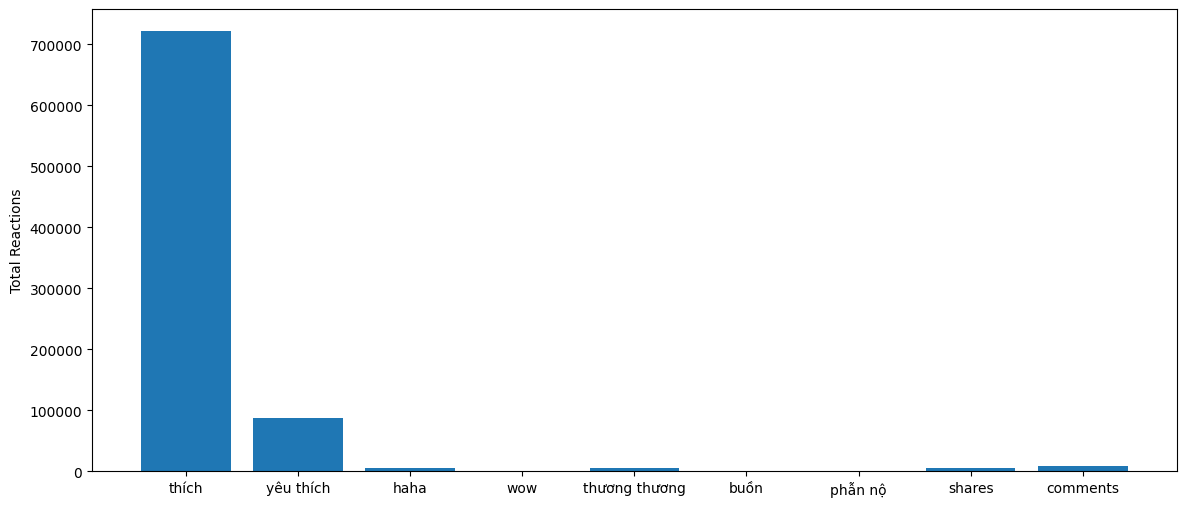

In [24]:
total_reactions = df[['thích', 'yêu thích', 'haha', 'wow', 'thương thương', 'buồn', 'phẫn nộ', 'shares', 'comments']].sum()
plt.figure(figsize=(14, 6))

plt.bar(total_reactions.index, total_reactions.values)

plt.ylabel('Total Reactions')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [43]:
df.iloc[1]['comments_full']

'[{\'comment_id\': \'2019491015104214\', \'comment_url\': \'https://facebook.com/2019491015104214\', \'commenter_id\': \'705306010\', \'commenter_url\': \'https://facebook.com/bstaaa?eav=AfZWdBymbjTBaPp7WFqg9t3WRUhJtdPVTHHttYq69HDxc31h5Qu4gvN5m4LwznqmLkQ&fref=nf&rc=p&refid=52&__tn__=R&paipv=0\', \'commenter_name\': \'Ahmed Nasr\', \'commenter_meta\': \'Fan cứng\', \'comment_text\': \'So, is it a tradition in BHAFC to receive a goal in the first minutes and spend the whole match looking for equalizer, this is really disappointing.\\n\\nIt happened in all recent matches\', \'comment_time\': datetime.datetime(2023, 11, 1, 0, 0), \'comment_image\': None, \'comment_reactors\': [], \'comment_reactions\': None, \'comment_reaction_count\': None, \'replies\': []}, {\'comment_id\': \'882406433089246\', \'comment_url\': \'https://facebook.com/882406433089246\', \'commenter_id\': \'61551206339547\', \'commenter_url\': \'https://facebook.com/FSL24?eav=Afbq2NHWjlW3jAsnXTwVTklziuRsg6EKQxL0UJs7AttYdTx

In [51]:
import re
commenter_name = []
commenter_id = []
comment_text = []
for i in df['comments_full']:
    input_string = i
    s = input_string.split(",")
    for i in s:
        data_string = i
        match_commenter_id = re.search(r"'commenter_id': '(\d+)'", data_string)
        match_commenter_name = re.search(r"'commenter_name': '([^']+)'", data_string)
        match_comment_text = re.search(r"'comment_text': '([^']+)'", data_string)
        if match_commenter_id:
            id = match_commenter_id.group(1)
            commenter_id.append(id)
        elif match_commenter_name:
            name = match_commenter_name.group(1)
            commenter_name.append(name)   
        elif match_comment_text:
            text = match_comment_text.group(1)
            comment_text.append(text)   

<Axes: xlabel='0'>

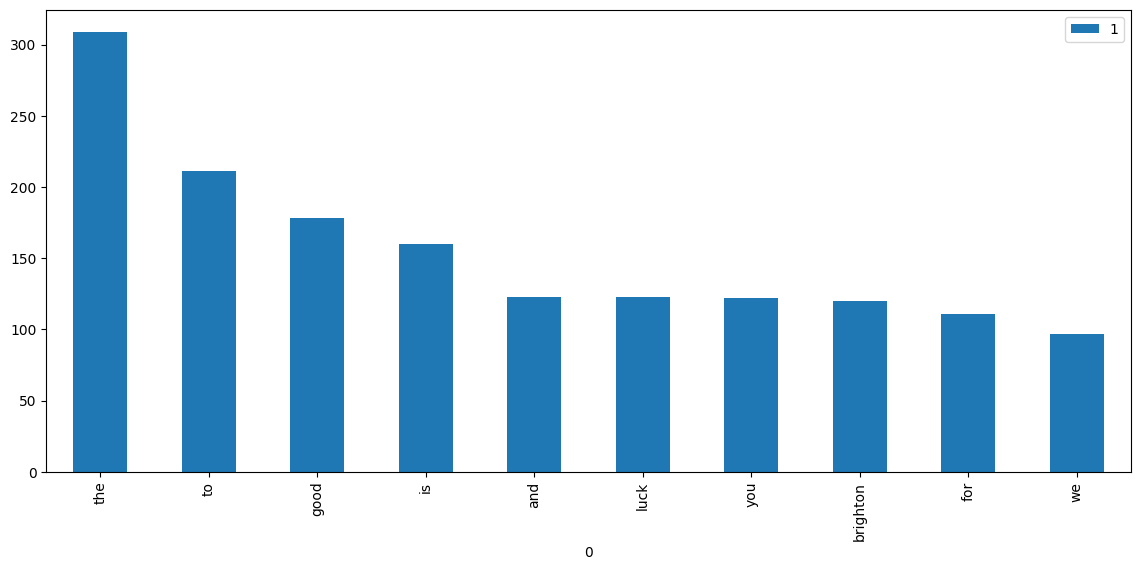

In [58]:
text = str(comment_text)
def wordFrequency(Ttext):
    words = re.findall(r'\b\w+\b', Ttext.lower())
    filterWords = [word for word in words if len(word)>1]
    fre = Counter(filterWords)
    return fre
fre = wordFrequency(text)

top10Words = fre.most_common(10)
dft10 = pd.DataFrame(top10Words)
dft10.index = dft10[0]
dft10.plot(kind='bar',figsize=(14,6))